# CSC11 - Introduction to Machine Learning - A1 - Q1

## Polynomial Regression
In this notebook, you are going to use the polynomial regression model that you implemented in the start code, and run several experiments in different settings of dataset size, degree of polynomial, and regularization coefficient. 
The result of these experiments are visualized using `matplotlib` library. 
The goal is to describe the plots, characterize overfitting/undefitting scenarios and explain them.

**Note:** You don't need to change/write any code in the notebook. After each part, you see some questions that you need to answer. Please provide you answer in the markdown cells and share the noteboook.

In [13]:
# import necessary libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from poly_reg import PolynomialRegression
import pickle
import matplotlib.pyplot as plt

def load_pkl(filename):
    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)
    return loaded_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Benchmark Loaders
The `load_dataset` function is to load a benchmark. It takes in an id (1 or 2) and loads the corresponding benchmark.
Each benchmark consists of four datasets. Three datasets are for training with various sizes of small, medium and large. And one dataset is used for testing.
We will reuse the function before running each experiment.

In [14]:
def load_dataset(id):
    """
    Args:
        - id (int): The id of the dataset to load.

    Returns:
        - datasets (dict): The small and large train plus test datasets for the given id.
    """
    dataset_dir = f"datasets_{id}"
    datasets = {
        "small_train": load_pkl(f"{dataset_dir}/small_train.pkl"),
        "medium_train": load_pkl(f"{dataset_dir}/medium_train.pkl"),
        "large_train": load_pkl(f"{dataset_dir}/large_train.pkl"),
        "test": load_pkl(f"{dataset_dir}/test.pkl")
    }
    return datasets

### Dataset Size

In the first part, for each benchmark, we employ the implemented regression model and fit it to three training datasets of different sizes. Then the mean squared error is computed for both the training and the test data. The errors are visualized with bar plots.

In [23]:
def data_size_experiment(datasets):
    # keep K fixed
    K = 10
    model = PolynomialRegression(K=K) # model

    train_dataset_list = ["small_train", "medium_train", "large_train"] # three datasets
    n_samples = np.zeros(len(train_dataset_list), dtype=int)
    train_loss = np.zeros(len(train_dataset_list), dtype=float)
    test_loss = np.zeros(len(train_dataset_list), dtype=float)

    # test data
    test_dataset = datasets["test"]
    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, train_dataset in enumerate(train_dataset_list): # iterate over three datasets
        train_dataset = datasets[train_dataset]
        train_X = train_dataset["X"]
        train_Y = train_dataset["Y"]
        model.fit(train_X, train_Y) # least squares fit
        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
        n_samples[i] = len(train_X) 
    return train_loss, test_loss, n_samples

<Figure size 640x480 with 0 Axes>

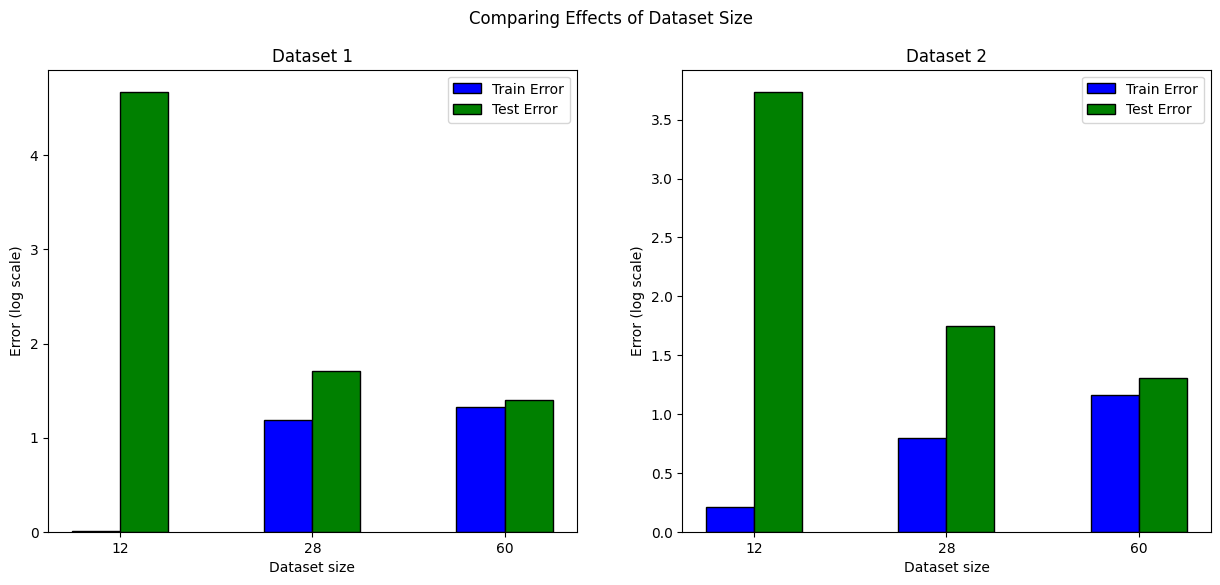

In [24]:
width = 0.25
plt.clf()
data_ids = [1, 2] # two benchmarks
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
for i, data_id in enumerate(data_ids):
    datasets = load_dataset(data_id) # load data
    train_loss, test_loss, n_samples = data_size_experiment(datasets=datasets) # run the experiment
    r = np.arange(len(n_samples))
    axs[i].bar(r, np.log(train_loss+1), color = 'b', width = width, edgecolor = 'black', label='Train Error')
    axs[i].bar(r + width, np.log(test_loss+1), color = 'g', width = width, edgecolor = 'black', label='Test Error')
    axs[i].set_xticks(ticks=r + width/2, labels=n_samples)
    axs[i].set_xlabel("Dataset size")
    axs[i].set_ylabel("Error (log scale)")
    axs[i].set_title(f"Dataset {data_id}")
    axs[i].legend()
plt.suptitle("Comparing Effects of Dataset Size")
plt.show()

**Questions**: Based on the above visualization,
- How does the dataset size affects the train error? 
- What about the test error? 
- Do you observe overfitting or underfitting when increasing the data size? 
- Is the trend consistent for both benchmarks? 

Please provide your justification.

**Answer**: Based on the above visualization,
- The relationship between dataset size and train error is as follow: **As the dataset size increases, the train error (log scale) also increases.** This is shown on the visualization that increasing the dataset/input size can introduce new error/noise.
- The relationship between dataset size and test error is as follow: **As the dataset size increases, the test error (log scale) also decreases.** It is because introducing more data will expose the model to more variety of data and give better generalization.
- When increasing the data size, we can observe that the difference between the test error and train error become less significant. Notice that as the data size increases, overfitting is reduced as the model is exposed to more variability, improving generalization. It is due to the model getting better understanding of the underlying relationship between the input and output of the data. 
- Yes, the trend and characteristics apply to both benchmarks.

### Model Complexity

Recall from the lecture that the polynomial order in the regression specifies the complexity of the model. 
In the second part, for the first the benchmark, the notebook fits polynomial models of different orders $K$, ranging
from 1 to 10, to training data of various sizes. Similarly, the mean squared error for both train and test data are visualized as a function of order $K$. 

In [17]:
def complexity_experiment(train_dataset, test_dataset):
    Ks = np.arange(1, 11) # 1 <= K <= 10
    train_loss = np.zeros(len(Ks), dtype=float)
    test_loss = np.zeros(len(Ks), dtype=float)

    train_X = train_dataset["X"]
    train_Y = train_dataset["Y"]

    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, K in enumerate(Ks):
        model = PolynomialRegression(K) # model with different Ks
        model.fit(train_X, train_Y) # least squares fit

        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
    return train_loss, test_loss, Ks

<Figure size 640x480 with 0 Axes>

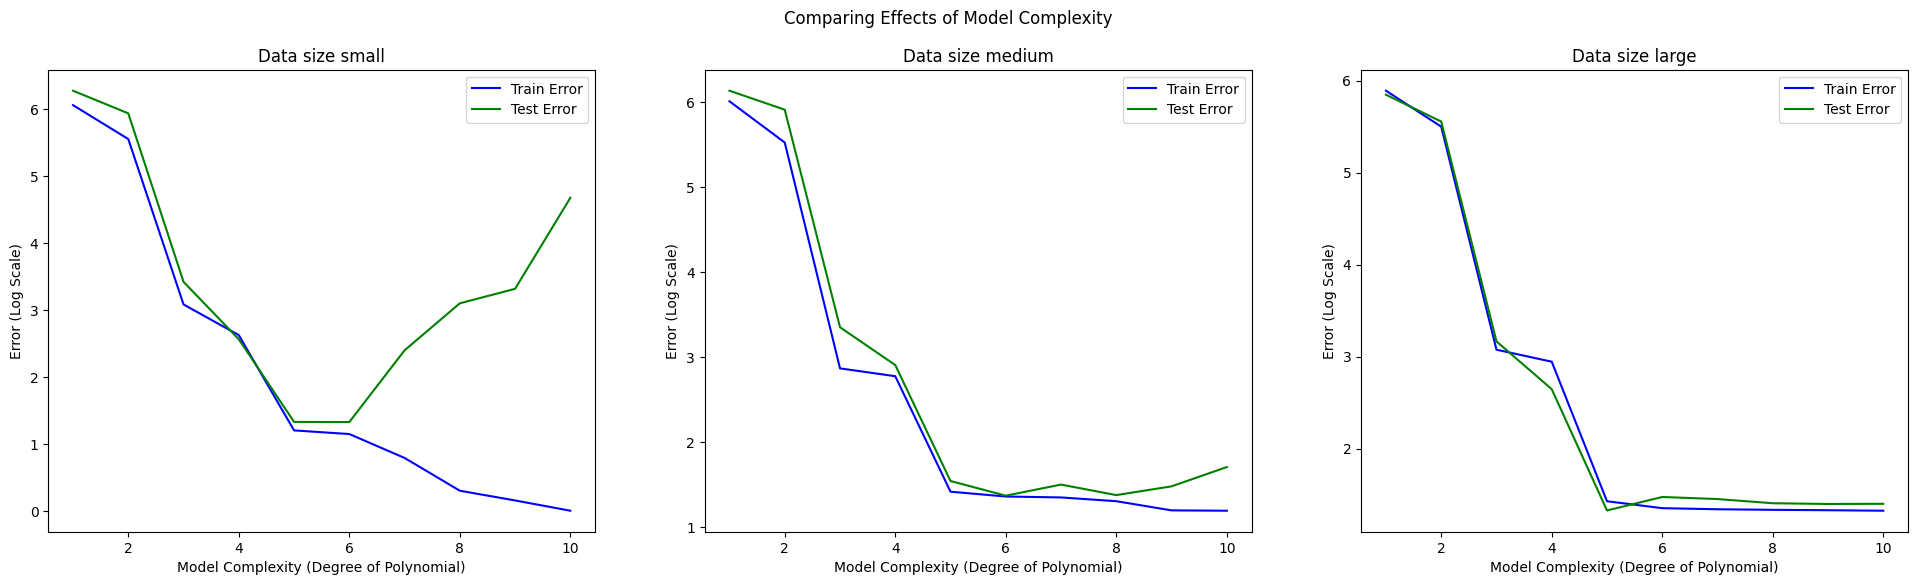

In [18]:
data_id = 1
datasets = load_dataset(data_id) # first benchmark
test_dataset = datasets["test"]
data_sizes = ["small", "medium", "large"]
plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
for i, data_size in enumerate(data_sizes): # iterate over three datasets
    train_dataset = datasets[f"{data_size}_train"]
    train_loss, test_loss, Ks = complexity_experiment(train_dataset, test_dataset) # run the experiment
    axs[i].plot(Ks, np.log(train_loss+1), color = 'b', label='Train Error')
    axs[i].plot(Ks, np.log(test_loss+1), color = 'g', label='Test Error')
    axs[i].set_xlabel("Model Complexity (Degree of Polynomial)")
    axs[i].set_ylabel("Error (Log Scale)")
    axs[i].set_title(f"Data size {data_size}")
    axs[i].legend()
plt.suptitle("Comparing Effects of Model Complexity")
plt.show()

**Questions:** 
- For the small training data, how does the train error changes when increasing complexity? 
- Does the test error follows the same trend? Can you describe the overfitting or underfitting cases? 
- When increasing the dataset size to medium or large, how does the test error curve change?
- What degree of polynomial was used to generate the data?

Please provide justifications.

**Answer:** 
- For the small training data, the **train error decreases as the degree of the polynomial increases**. This is shown on the visualization that as the model complexity increases, the error (log scale) decreases.
- **No**, the the test error follows a different trend. Initially, the test error decreases as model complexity increases , then, after a certain point (e.g. degree of polynomial 5 in the small data set), the test error starts increasing. 
We can observe that overfitting happens when degree of polynomial is between [5, 10] whereas underfitting happens when degree of polynomial is [1, 5].
- For medium and large dataset, the error curve decreases as the degree of the polynomial increases. However, the difference with the small dataset is that both medium and large dataset do not have a certain point that changes the trend significantly. 
    The error curve decreases when degree of model is between [1, 5] and become slightly bigger than training error between [5, 10]. This is a sign of overfitting, but it correspons with the fact that the data size is significantly larger and contain more error/noise.
- As the model shows, the data is most probably generated with **degree of polynomial 5**. We can observe that in the small dataset, the end point of the underfitting part and the start point of the overfitting part is at degree of polynomial 5.

### Regularization coefficient
Finally, you fit the polynomial model using regularized least squares with various regularization coefficients for the second benchmark. 
The mean squared error for both train and test data are visualized as a function of the egularization coefficient.

In [19]:
def regularization_experiment(train_dataset, test_dataset):
    K = 10 # keep K fixed
    l2_coeffs = np.linspace(0, 1.5, 20) # regularization coefficient

    train_loss = np.zeros(len(l2_coeffs), dtype=float)
    test_loss = np.zeros(len(l2_coeffs), dtype=float)

    train_X = train_dataset["X"]
    train_Y = train_dataset["Y"]

    test_X = test_dataset["X"]
    test_Y = test_dataset["Y"]

    for i, l2_coeff in enumerate(l2_coeffs): # iterate over different l2 coefficients
        model = PolynomialRegression(K, l2_coeff)
        model.fit_with_l2_regularization(train_X, train_Y) # fit with l2 regularization

        train_loss[i] = model.compute_mse(train_X, train_Y) # mse on train data
        test_loss[i] = model.compute_mse(test_X, test_Y) # mse on test data
        
    return train_loss, test_loss, l2_coeffs

<Figure size 640x480 with 0 Axes>

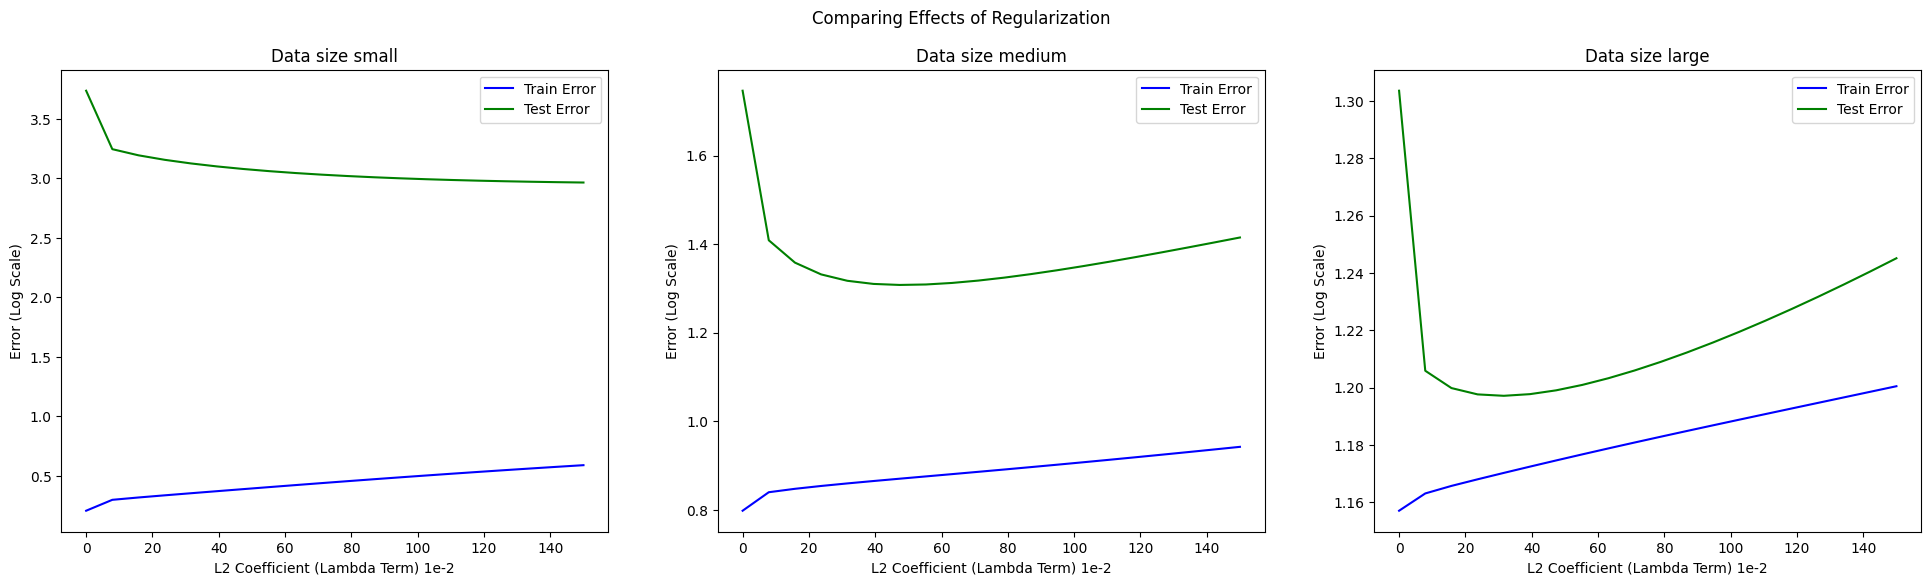

In [20]:
data_id = 2
datasets = load_dataset(data_id) # second benchmark
test_dataset = datasets["test"]

data_sizes = ["small", "medium", "large"]
plt.clf()
fig, axs = plt.subplots(1, 3, figsize=(24, 6))
for i, data_size in enumerate(data_sizes): # iterate over three datasets
    train_dataset = datasets[f"{data_size}_train"]
    train_loss, test_loss, l2_coeffs = regularization_experiment(train_dataset, test_dataset) # run the experiment
    axs[i].plot(l2_coeffs * 1e2, np.log(train_loss+1), color = 'b', label='Train Error')
    axs[i].plot(l2_coeffs * 1e2, np.log(test_loss+1), color = 'g', label='Test Error')
    axs[i].set_title(f"Data size {data_size}")
    axs[i].set_xlabel("L2 Coefficient (Lambda Term) 1e-2")
    axs[i].set_ylabel("Error (Log Scale)")
    axs[i].legend()
plt.suptitle("Comparing Effects of Regularization")
plt.show()

**Question:** 
- How does the error on training data change when increasing the regularization coefficient? 
- What about the test data? Describe overfitting and underfitting cases.
- How does the trend change across datasets of different sizes? 

Please provide justifications.

**Answer:** 
- The error on training data is increasing as lambda term increases. This is because when lambda increases, the penalty on weight increases and gives higher training error because the model is less flexible and cannot fit the data perfectly.
- For test data, we can observe that test error initially decreases as regularization removes overfitting. However, at some point, test error increases due to underfitting. For the small data size, the error continues to decreases at slower rate, but the overall error is still very high. On the other hand, for the medium size and large size data set, small lambda results in overfitting while the error decreases to a certain point (~15e-2). However, after reaching that point, the error shows insignificant increase as lambda increases (underfitting).
- Overall, regularization is most crucial for small datasets and becomes less necessary as the dataset size grows. For small datasets, model is prone to overfit, so increasing the regularization initially reduces test error by preventing the model from fitting noise. However, as dataset size grows, the model receives a variety of information, reducing the risk of overfitting even with minimal regularization. As a result, after some point, the regularization becomes unnecessary and leads to underfitting.